# Estimate Maximum Frequency needed to resolve HM constent using preliminary results for final mass and spin

In [23]:
from positive import *
from nrutils.core.units import *
from numpy import *

In [14]:

M1,M2 = 32.33976896337232,8.64925137694713
M = M1+M2

m1 = M1/M
m2 = M2/M

print 'm1,m2 = ',m1,m2 
chi1,chi2 = 0.3482097377216557,0.03449982868594995

m1,m2 =  0.788986140553 0.211013859447


In [26]:
mf = 39.7862247656272/M
jf = 0.6635823840977887

In [27]:
print mf,jf

0.970655664256 0.663582384098


In [19]:
?leaver

In [117]:
def calc_phys_rd_freq(l,m,verbose=True):
    cw,sc = leaver(jf,l,m,Mf=mf)
    frd = cw.real/(2*pi)
    frd_phys = physf(frd,mf*M)
    alert('frd_phys_%i%i = %1.4f (Hz) ...%1.4f... newxt pow2 twice this is %f'%(l,m,frd_phys,2*frd_phys,2**ceil( log(2*frd_phys)/log(2) )))

In [118]:
lmlist = [(2,2),(3,3),(4,4),(5,5)]
alert('Ringdown Frequencies for S190412m',header=True)
for l,m in lmlist:
    calc_phys_rd_freq(l,m)


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(notebook)>> Ringdown Frequencies for S190412m
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(calc_phys_rd_freq)>> frd_phys_22 = 432.8073 (Hz) ...865.6146... newxt pow2 twice this is 1024.000000
(calc_phys_rd_freq)>> frd_phys_33 = 686.9019 (Hz) ...1373.8039... newxt pow2 twice this is 2048.000000
(calc_phys_rd_freq)>> frd_phys_44 = 930.4125 (Hz) ...1860.8250... newxt pow2 twice this is 2048.000000
(calc_phys_rd_freq)>> frd_phys_55 = 1168.7259 (Hz) ...2337.4517... newxt pow2 twice this is 4096.000000


In [114]:
2**ceil( log(2337.451739)/log(2) )

4096.0

In [72]:
# N = 1/(dt*df)
# Ndf = 1/dt
# Ndt = 1/df
1.0/8
srate = 1024.0 # 2048.0
dt = 1.0/srate
seglen = 8.0
N = seglen/dt
df = 1.0/seglen
print 'N = ',N
print 'df = ',df
print 'fmax = N*df = srate = ',N*df

N =  8192.0
df =  0.125
fmax = N*df = srate =  1024.0


# Config Notes and Requirements for higher modes
---
The estimated ringdown ferquency of the $\ell=m=4$ multipole moment is: **~950 Hz**
And the estimated ringdown ferquency of the $\ell=m=5$ multipole moment is: **~1200 Hz**
Therefore:
* Given that there's very little physical reason to think that the l=m=5 mode should be important, therefore parameters should be chosen to accomodate the 44 multipole 
* the PSD should be computed to include this frequency
* The segment lengh, *T*, should be such that the frequency domain *df* is small enough to resolve frequencies in the HM evolution -- this technically maters the most at low frequencies where the frequency domain phase evolves the fastest. The segment length (containting a chunk seglen (sec) to the left of trigtime+2) should also include as much of the signal as is physically reasonable (eg as estimate from the chirp time and accounting for the fact that higher multipoles have higher freuqncies ~m/2, meaning that if likelihood integrals start at 20Hz, this should include information at 20Hz from the highest mode of interest -- the seglen should be large enough to account for the relate HM chirp).

## Config Recommendations:
```ini
# this is ~6 sec of inspiral to account for HMs chirp up to (4,4) in inspiral
seglen = 8   
# to resolve up to the (4,4) in the ringdown (only as an upper limit)
srate = 1024 
```

#### Other notes:
* Don't set chirpmass bounds becuase ROQ isnt being used. Chirpmass bounds distort the q prior, which is perhaps best set to the default flat prior (as m1 and m2 are flat).
* Carl says that we want to use the same spin prior for precessing and non-precessing runs. For precessing approxs, ```a_spin*-min and alignedspin-zprior``` lines should be commented out.

## PSDs for C01 and C01_sub60Hz **8 sec**
```ini
# H1 C01 8sec
H1-psd = /home/carl-johan.haster/projects/O3/S190412m/makeBW/C01/H1_8s/post/clean/glitch_median_PSD_forLI_H1.dat
# L1 C01 8sec
L1-psd = /home/carl-johan.haster/projects/O3/S190412m/makeBW/C01/L1_8s/post/clean/glitch_median_PSD_forLI_L1.dat
```
```ini
# H1 C01_60Hz 8sec
H1-psd = /home/carl-johan.haster/projects/O3/S190412m/makeBW/C01/H1_8s_sub60Hz/post/clean/glitch_median_PSD_forLI_H1.dat
# L1 C01_60Hz 8sec
L1-psd = /home/carl-johan.haster/projects/O3/S190412m/makeBW/C01/L1_8s_sub60Hz/post/clean/glitch_median_PSD_forLI_L1.dat
```

## Channel Names and Types

**C01**
```ini
[datafind]
url-type = file
types = {'H1': 'H1_HOFT_CLEAN_C01', 'L1': 'L1_HOFT_CLEAN_C01','V1': 'V1Online'}

[data]
channels = {'H1': 'H1:DCS-CALIB_STRAIN_CLEAN_C01', 'L1': 'L1:DCS-CALIB_STRAIN_CLEAN_C01', 'V1': 'V1:Hrec_hoft_16384Hz'}
```

**C01_sub60Hz**
```ini
[datafind]
url-type = file
types = {'H1': 'H1_HOFT_CLEAN_SUB60HZ_C01', 'L1': 'L1_HOFT_CLEAN_SUB60HZ_C01','V1': 'V1Online'}

[data]
channels = {'H1': 'H1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01', 'L1': 'L1:DCS-CALIB_STRAIN_CLEAN_SUB60HZ_C01', 'V1': 'V1:Hrec_hoft_16384Hz'}
```


# PE Experiments
---

## (A) Compare C01 with C01_sub60Hz

* approx: PhenomPv2, PhenomHM

## (B) Vary: seglen with PhenomPv2+HM (4 runs)


*Using: C01_60HZ*


* EXP1
``` ini
seglen = 4
```

* EXP1
``` ini
seglen = 8
```


## (C) Vary: Approximant (MCMC)
* PhenomPv2
* PhenomD
* PhenomHM

## Vary: Approximant (NEST)
* PhenomHM
* PhenomPv2
* PhenomD
### Fast Settings 
```
nlive = 128
neff = 64
```
### Production Settings 
```
nlive = 1024
neff = 300
```

In [74]:
from nrutils import scsearch,gwylm

In [78]:
A = scsearch(q=3,verbose=True)

(scsearch)>> Found q (=3) keyword.
(scsearch)>> Found verbose (=True) keyword.
## Found 72 possibly degenerate simulations:
[0001][hogshead] q3: 1chi0.75-p-q3.00	(p0801HR_3)
[0002][hogshead] q3: 1chi0.75-p-q3.00	(q3a075t90_p0801_HR)
[0003][hogshead] q3: 1chi0.75-p-q3.00	(q3a075t90_p0801)
[0004][hogshead] q3: 1chi0.75-p-q3.00	(q3a075t90_p078)
[0005][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th345_m140)
[0006][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th330_m140)
[0007][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th315_m140)
[0008][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th300_m140)
[0009][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th270_m140)
[0010][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th240_m140)
[0011][bradwr] Sq-series: qc-1chi0.60-2chi0.60-p-q3.00	(Sq_D6.2_q3.00_a0.6_th210_m140)
[0012][bradwr] Sq-series: qc-1chi0.60-2chi0.60-

In [94]:
y = gwylm(A[22],lm=[(2,2),(4,4)],verbose=True,clean=True)
y = y.hybridize()

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=[(2, 2), (4, 4)]) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x11516b560>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__init__)>> Using default M_RELATIVE_SIGN_CONVENTION of 1
(gwylm)>> The (extraction_parameter,level) is (75.0,None), which differs from the config values of (75,0). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (4, 4)]
(load)>> Using the default extraction_parameter of 75
(load)>> Using the default level of 75
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l2_m2_r75.00.asc
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (15994, 3). Now the shape is (15997, 3).
(load)>> Using the default extraction_parameter of 75
(load)>> Using the default

/Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/manipulate/hybridize.py:532: RuntimeWarning: divide by zero encountered in divide
  scale_factor = mean( nr_amp[k]/pn_amp[k] )
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:32: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeffs = lstsq( alpha, centered_scalar_range )[0]


(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by 1.220091 (rad).


/Users/book/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/book/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1313: RuntimeWarning: invalid value encountered in divide
  phares = ( sunwrap(angle(fit_range)) - sunwrap(angle(this.range)) ) / sunwrap(angle(this.range))



# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #
(__calc_multipole_hybrids__)>> Creating hybrid for: (4, 4)
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ #

(__get_aligned_nr_pn_amp_phase__!)>> The PN phase will be shifted by 2.231880 (rad).
(__calc_single_multipole_hybrid__!)>> The NR data appares to be sufficiently smooth. No bridge model will be used.
(__calc_multipole_hybrids__)>> Calculating hybrid strain.
(calchlm)>> w22 = m*w22/2 = 0.035105 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
(gwylm.calchlm)>> The user should note that there is no minus sign used in front of the double time integral for strain (i.e. Eq 4 of arxiv:1006.1632). This differs from Eq 3.4 of arxiv:0707.4654v3. The net effect is a rotation of the overall polarization of pi degrees. The user should also note that there is no minus sign applied to h_cross meaning that the user must be mindful to write h_plus-1j*h_cross

In [97]:
a,b = y

In [108]:
h22 =  physh(a[2,2]['psi4'],40.0,501.0)
h44 =  physh(a[4,4]['psi4'],40.0,501.0)

In [109]:
%matplotlib inline
from matplotlib.pyplot import *

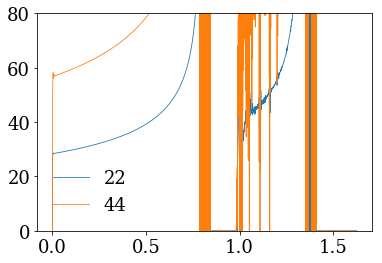

In [110]:
plot( h22.t, h22.dphi/(2*pi),label='22' )
plot( h44.t, h44.dphi/(2*pi),label='44' )
ylim([0,80])
legend()

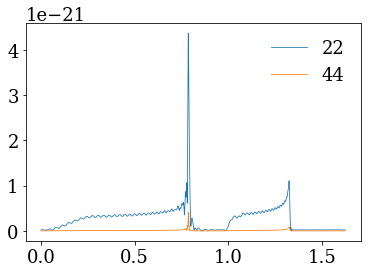

In [101]:
plot( h22.t, h22.amp,label='22' )
plot( h44.t, h44.amp,label='44' )
# ylim([0,40])
legend()